# Exploratory data analysis

In [52]:
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

Solving environment: ...working... done

# All requested packages already installed.



In [53]:
import pandas as pd

In [54]:
df = pd.read_csv('EGFR_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.00,active
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,300.00,active
2,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,7820.00,intermediate
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.00,active
4,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,40.00,active
...,...,...,...,...
13892,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,20.00,active
13893,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,4.59,active
13894,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.00,active
13895,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.00,active


In [55]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [56]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [57]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL68920,41.00,active,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...
1,CHEMBL68920,300.00,active,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...
2,CHEMBL68920,7820.00,intermediate,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...
3,CHEMBL69960,170.00,active,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...
4,CHEMBL69960,40.00,active,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...
...,...,...,...,...
13892,CHEMBL4520788,20.00,active,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...
13893,CHEMBL1800685,4.59,active,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...
13894,CHEMBL4088216,1000.00,active,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...
13895,CHEMBL4549667,1000.00,active,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...


# Calculate Lipinski descriptors

Lipinski descriptors, developed by Christopher Lipinski, are a means of evaluating the "druglikeness" of compounds based on factors like absorption, distribution, metabolism, and excretion (aka ADME). This is also known as the pharmacokinetic profile of a compound. 

Lipinski's Rule sets the following criteria for "druglikeness":
- molecular weight < 500 Da
- octanol-water partition coefficient (LogP) < 5
- hydrogen bond donors < 5
- hydrogen bond acceptors < 10

In [58]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

Calculate descriptors

In [59]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

# function for calculating Lipinski descriptors given an input of SMILES
# notation which contains exact atomic details of molecule

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [60]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,383.814,4.45034,3.0,4.0
1,383.814,4.45034,3.0,4.0
2,383.814,4.45034,3.0,4.0
3,482.903,3.61432,3.0,6.0
4,482.903,3.61432,3.0,6.0
...,...,...,...,...
13892,448.592,5.57642,2.0,7.0
13893,475.510,7.35780,2.0,2.0
13894,402.454,2.35370,0.0,5.0
13895,481.350,3.11620,0.0,5.0


# Combine DataFrames

Firstly, the DataFrame obtained from the lipinski function:

In [61]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,383.814,4.45034,3.0,4.0
1,383.814,4.45034,3.0,4.0
2,383.814,4.45034,3.0,4.0
3,482.903,3.61432,3.0,6.0
4,482.903,3.61432,3.0,6.0
...,...,...,...,...
13892,448.592,5.57642,2.0,7.0
13893,475.510,7.35780,2.0,2.0
13894,402.454,2.35370,0.0,5.0
13895,481.350,3.11620,0.0,5.0


Secondly, the DataFrame containing molecule_chembl_id, standard_value, and bioactivity_class values:

In [62]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.00,active
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,300.00,active
2,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,7820.00,intermediate
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.00,active
4,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,40.00,active
...,...,...,...,...
13892,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,20.00,active
13893,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,4.59,active
13894,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.00,active
13895,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.00,active


In [63]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [64]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.00,active,383.814,4.45034,3.0,4.0
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,300.00,active,383.814,4.45034,3.0,4.0
2,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,7820.00,intermediate,383.814,4.45034,3.0,4.0
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.00,active,482.903,3.61432,3.0,6.0
4,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,40.00,active,482.903,3.61432,3.0,6.0
...,...,...,...,...,...,...,...,...
13892,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,20.00,active,448.592,5.57642,2.0,7.0
13893,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,4.59,active,475.510,7.35780,2.0,2.0
13894,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.00,active,402.454,2.35370,0.0,5.0
13895,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.00,active,481.350,3.11620,0.0,5.0


# Convert IC50 to pIC50

IC50 must be converted to a negative logarithmic scale (-log10(IC50)) to allow more uniform distribution of data.

The custom function pIC50() accepts a DataFrame as input and will:
- Take the IC50 values from the standard_value column and convert them from nM to M by multiplying the value by 10^-9
- Take the molar value and apply -log10
- Delete the standard_value column and create a new pIC50 column

In [65]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative. 

In [66]:
df_combined.standard_value.describe()

count    1.389700e+04
mean     3.345520e+04
std      6.179212e+05
min      2.000000e-03
25%      2.000000e+01
50%      2.170000e+02
75%      4.600000e+03
max      5.500000e+07
Name: standard_value, dtype: float64

Apply the norm_value() function to normalize the values in the standard_value column

In [67]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [68]:
df_norm = norm_value(df_combined)
df_norm

C:\Users\cmkin\AppData\Local\Temp\ipykernel_15704\3416609517.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,41.00
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,300.00
2,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,intermediate,383.814,4.45034,3.0,4.0,7820.00
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,170.00
4,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,40.00
...,...,...,...,...,...,...,...,...
13892,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,active,448.592,5.57642,2.0,7.0,20.00
13893,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,active,475.510,7.35780,2.0,2.0,4.59
13894,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0.0,5.0,1000.00
13895,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0.0,5.0,1000.00


In [69]:
df_norm.standard_value_norm.describe()

count    1.389700e+04
mean     3.345520e+04
std      6.179212e+05
min      2.000000e-03
25%      2.000000e+01
50%      2.170000e+02
75%      4.600000e+03
max      5.500000e+07
Name: standard_value_norm, dtype: float64

In [70]:
df_final = pIC50(df_norm)
df_final

C:\Users\cmkin\AppData\Local\Temp\ipykernel_15704\3442786292.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,7.387216
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,6.522879
2,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,intermediate,383.814,4.45034,3.0,4.0,5.106793
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,6.769551
4,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,7.397940
...,...,...,...,...,...,...,...,...
13892,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,active,448.592,5.57642,2.0,7.0,7.698970
13893,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,active,475.510,7.35780,2.0,2.0,8.338187
13894,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0.0,5.0,6.000000
13895,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0.0,5.0,6.000000


In [71]:
df_final.pIC50.describe()

count    13897.000000
mean         6.593433
std          1.509271
min          1.259637
25%          5.337242
50%          6.663540
75%          7.698970
max         11.698970
Name: pIC50, dtype: float64

In [72]:
df_final.to_csv('EGFR_04_bioactivity_data_3class_pIC50.csv')

# Remove the "intermediate" bioactivity class

The intermediate bioactivity class will be removed from the data set to enable simple comparison between the classes.

In [73]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,7.387216
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,6.522879
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,6.769551
4,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,7.397940
5,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,6.356547
...,...,...,...,...,...,...,...,...
13892,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,active,448.592,5.57642,2.0,7.0,7.698970
13893,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,active,475.510,7.35780,2.0,2.0,8.338187
13894,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0.0,5.0,6.000000
13895,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0.0,5.0,6.000000


In [74]:
df_2class.to_csv('EGFR_05_bioactivity_data_2class_pIC50.csv')

# Chemical Space Analysis via Lipinski descriptors

In [75]:
import seaborn as sns
sns.set_style("ticks")
import matplotlib.pyplot as plt

Frequency plot of the two biactivity classes

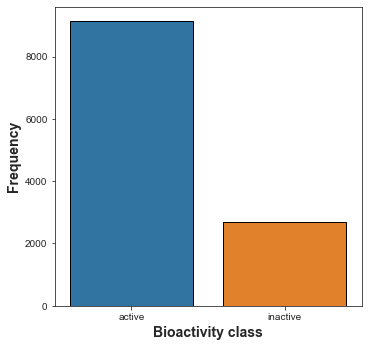

In [76]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('EGFR_plot_bioactivity_class.pdf')

Scatter plot of MW versus LogP

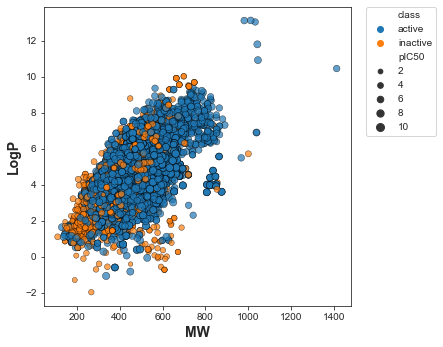

In [77]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('EGFR_plot_MW_vs_LogP.pdf')

This plot demonstrates that the two bioactivity classes, for the most part, span similar chemical spaces.

Box plot of pIC50 value

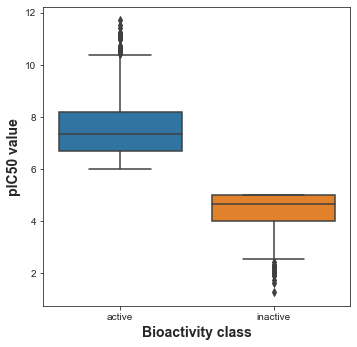

In [78]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('EGFR_plot_ic50.pdf')

Utilize the Mann-Whitney U Test for statistical analysis

In [79]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [80]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,24636048.0,0.0,0.05,Different distribution (reject H0)


Box plot of molecular weight

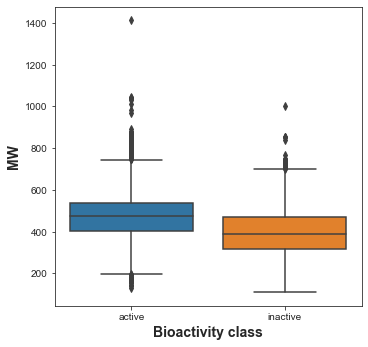

In [81]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('EGFR_plot_MW.pdf')

In [82]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,17249859.5,1.054800e-219,0.05,Different distribution (reject H0)


Box plot of LogP

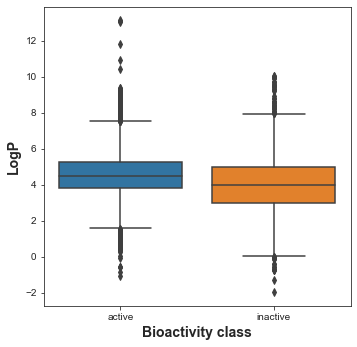

In [83]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('EGFR_plot_LogP.pdf')

In [84]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,15226811.5,1.028578e-77,0.05,Different distribution (reject H0)


Box plot of NumHDonors

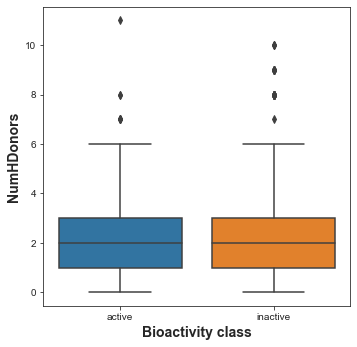

In [85]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('EGFR_plot_NumHDonors.pdf')

In [86]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,12961412.5,0.000012,0.05,Different distribution (reject H0)


Box plot of NumHAcceptors

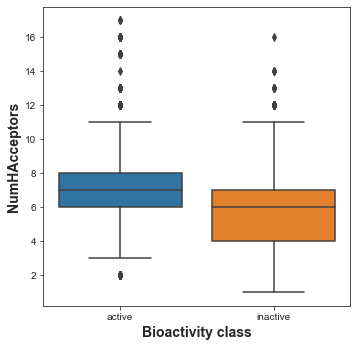

In [87]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('EGFR_plot_NumHAcceptors.pdf')

In [88]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,16755929.0,2.874078e-182,0.05,Different distribution (reject H0)


# Interpretation of statistical results

According to the pIC50 values, the active and inactive compounds displayed statistically significant difference, which is to be expected given the IC50 values used to define active vs. inactive compounds.

Summary of Lipinski's descriptors:
- MW: different distribution
- LogP: different distribution
- NumHDonors: different distribution
- NumHAcceptors: different distribution

All of the Lipinski descriptors exhibit statistically significant differences between the active and inactive compounds.